In [1]:
import pandas as pd
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset and show it

In [2]:
dataset = pd.read_csv("breast-cancer.csv")
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


## Describe the dataset to show the mean, std and etc for every column of the data

In [67]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# Data Corelation and Covariance

In [4]:
# Covariance
dataset.cov()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.563015e+16,3.287883e+07,5.364807e+07,2.222490e+08,4.262946e+09,-22802.053383,631.883924,499127.721282,214217.739286,-75792.615857,...,4.973106e+07,3.360214e+08,7.629681e+09,29510.163781,-58383.413342,605181.617857,289052.809853,-342061.639212,-67437.508622,NaN
radius_mean,3.287883e+07,1.241892e+01,4.907582e+00,8.544714e+01,1.224483e+03,0.008454,0.094197,0.190128,0.112475,0.014273,...,6.433100e+00,1.142886e+02,1.888227e+03,0.009625,0.229249,0.387386,0.172393,0.035746,0.000450,NaN
texture_mean,5.364807e+07,4.907582e+00,1.849891e+01,3.443976e+01,4.859938e+02,-0.001415,0.053767,0.103692,0.048977,0.008419,...,2.411015e+01,5.174593e+01,8.412838e+02,0.007611,0.188010,0.270110,0.083491,0.027942,0.009260,NaN
perimeter_mean,2.222490e+08,8.544714e+01,3.443976e+01,5.904405e+02,8.435772e+03,0.070836,0.714714,1.387234,0.802360,0.121922,...,4.525811e+01,7.923282e+02,1.302615e+04,0.083526,1.742478,2.858506,1.231848,0.284300,0.022391,NaN
area_mean,4.262946e+09,1.224483e+03,4.859938e+02,8.435772e+03,1.238436e+05,0.876178,9.264931,19.244924,11.241958,1.459596,...,6.218249e+02,1.134179e+04,1.921926e+05,0.992514,21.616602,37.634415,16.701789,3.125809,0.023756,NaN
smoothness_mean,-2.280205e+04,8.454460e-03,-1.414779e-03,7.083607e-02,8.761781e-01,0.000198,0.000490,0.000585,0.000302,0.000215,...,3.118110e-03,1.128795e-01,1.655299e+00,0.000259,0.001045,0.001276,0.000465,0.000343,0.000127,NaN
compactness_mean,6.318839e+02,9.419706e-02,5.376681e-02,7.147141e-01,9.264931e+00,0.000490,0.002789,0.003718,0.001703,0.000873,...,8.054412e-02,1.047413e+00,1.532344e+01,0.000682,0.007194,0.008994,0.002831,0.001667,0.000656,NaN
concavity_mean,4.991277e+05,1.901276e-01,1.036923e-01,1.387234e+00,1.924492e+01,0.000585,0.003718,0.006355,0.002850,0.001094,...,1.469342e-01,1.954350e+00,3.068241e+01,0.000817,0.009469,0.014704,0.004513,0.002020,0.000741,NaN
concave points_mean,2.142177e+05,1.124751e-01,4.897693e-02,8.023604e-01,1.124196e+01,0.000302,0.001703,0.002850,0.001506,0.000492,...,6.981902e-02,1.116016e+00,1.788688e+01,0.000401,0.004075,0.006091,0.002321,0.000902,0.000258,NaN
symmetry_mean,-7.579262e+04,1.427317e-02,8.418876e-03,1.219216e-01,1.459596e+00,0.000215,0.000873,0.001094,0.000492,0.000752,...,1.527421e-02,2.018958e-01,2.765725e+00,0.000267,0.002041,0.002481,0.000775,0.001187,0.000217,NaN


In [5]:
# Correlation
dataset.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


# Visualisasi Data

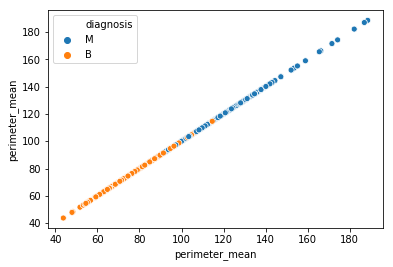

In [16]:
sns.scatterplot(x = dataset["perimeter_mean"], y = dataset["perimeter_mean"], hue = "diagnosis", data = dataset)

# Clasification

In [3]:
y = dataset["diagnosis"]
y.replace(("M", "B"),(0,1), inplace=True)
x = dataset.drop("diagnosis", axis =1)
x = x.drop("id", axis=1)
x = x.drop("Unnamed: 32", axis=1)

In [4]:
# Split the data for training and testing data

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.10, random_state=42)

In [5]:
# count score of testing process
def showScoreResult(a, b):
    print("Mean absolute error: %.2f" % np.mean(np.absolute(a - b)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((a - b) ** 2))
    print("R2-score: %.2f" % r2_score(a , b))

# func to show regression plot 
def showRegPlot(data_feature, label):
    label = np.array(label,"int")
    data = np.array(data_feature,"int")
    dataframe = pd.DataFrame(columns=('x', 'y', 'diagnosis'))
    for i in range(len(data[:,0])-1):
        dataframe.set_value(len(dataframe), ['x','y','diagnosis'], [data[:,1][i],data[:,3][i],label[i]])
    sns.regplot(x="x", y="y", data=dataframe)
    sns.scatterplot(x="x", y="y",hue="diagnosis",data=dataframe)
    

In [6]:
# knn
from sklearn.neighbors import KNeighborsClassifier #library KNN
# make teh knn object with k = 1
clf = KNeighborsClassifier(n_neighbors=1) 
# fit the training data
clf.fit(train_x, train_y)
# show score or acuration from training or learning process
print("Score :  ", clf.score(train_x, train_y) * 100, "%")#training score

Score :   100.0 %


In [9]:
# try predict the testing data
predict = clf.predict(test_x)
true_label = np.array(test_y)

In [12]:
# Show the score
showScoreResult(true_label, predict)

Mean absolute error: 0.02
Residual sum of squares (MSE): 0.02
R2-score: 0.92


## Show clasification visualisation

/home/aria/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


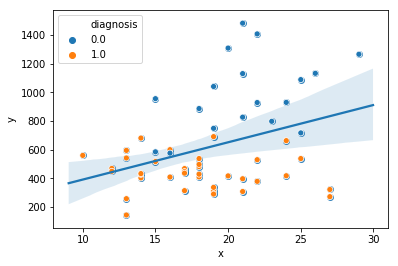

In [8]:
# result of predict
showRegPlot(test_x, predict)

/home/aria/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


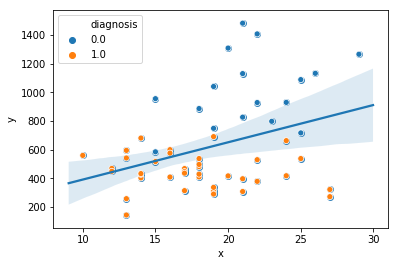

In [13]:
# result of expected value
showRegPlot(test_x, test_y)

## Test power of the KNN Alogrithm for this dataset

In [27]:
error = []
# k value will dynamicly change with the iteration 1 - 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    error.append(np.mean(pred_i != test_y))

Text(0, 0.5, 'Mean Error')

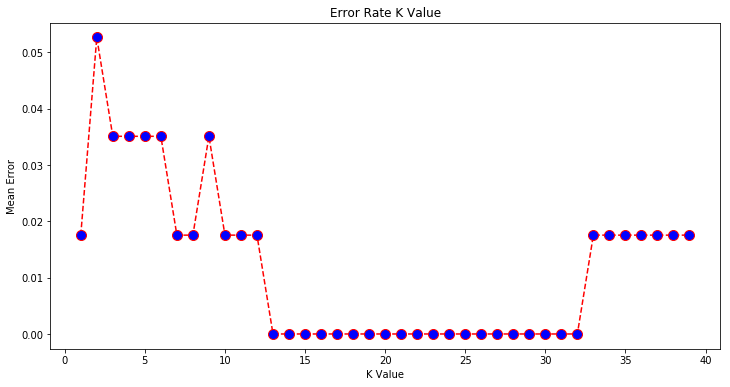

In [28]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

# Regresion

In [16]:
from sklearn import linear_model
# create Logistic Regression model
regr = linear_model.LogisticRegression()
# fit or training the training data that we have splited before
regr.fit (train_x, train_y)
# show the score of training process
regr.score(train_x,train_y)

/home/aria/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.955078125

In [18]:
# doing predict for testting data and show the R2 Score of it
regresion_predict = regr.predict(test_x)
showScoreResult(np.array(regresion_predict), test_y)

Mean absolute error: 0.02
Residual sum of squares (MSE): 0.02
R2-score: 0.91


## Regresion Visualisation

/home/aria/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


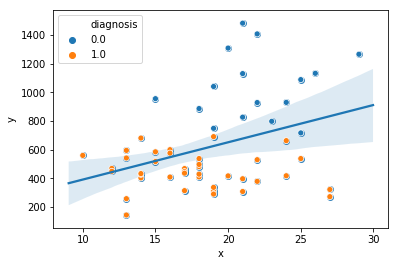

In [69]:
# predict result
showRegPlot(test_x, regresion_predict)

/home/aria/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


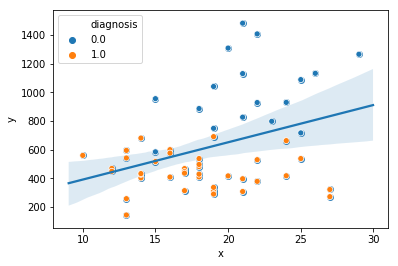

In [19]:
# with expected value
showRegPlot(test_x, test_y)

# Clustering

In [20]:
from sklearn.cluster import KMeans
# take teh columns of the data that we will use to doing clustering
X = dataset[['radius_mean', 'texture_mean', 'perimeter_mean']]
# create the K-Means model with 2 cluster
kmn = KMeans(n_clusters=2)
# fit the X data to get result of clustering ( here we get the lable of each data)
clus = kmn.fit(X)
# save the labels to Y
y = clus.labels_

In [21]:
# show score of clustering with silhouette score
from sklearn.metrics import silhouette_score
# create the silhoutte score model with paramters (X,y)
silscore = silhouette_score(X,y)
# print the score
print(silscore)

0.6135789116737812


In [46]:
%matplotlib inline

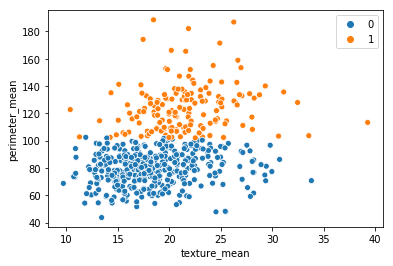

In [22]:
# show result of clustering with the result label
ax = sns.scatterplot(x=X["texture_mean"],y=X["perimeter_mean"], hue=y )

# ARM

In [23]:
# discritization function
def discretization(attr):
    inp = list(dataset[attr].to_numpy())
    midi = dataset[attr].describe()
    out = []
    for x in inp:
        if(x<=float(midi.loc['25%'])):
            out.append("Small")
        elif(x>float(midi.loc['25%']) and x<=float(midi.loc['50%'])):
            out.append("Medium")
        elif(x>float(midi.loc['50%']) and x<=float(midi.loc['75%'])):
            out.append("Large")
#         if(x<=float(midi.loc['25%'])):
#             out.append("Large")    
        else:
            out.append("X Large")
    return out
# multy discritization function
def multiDiscretization(attrs):
    for x in attrs:
        dataset[x+'_disc'] = pd.Series(discretization(x),index=dataset.index)

In [24]:
dataset["perimeter_mean"].describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

In [25]:
multiDiscretization(['perimeter_mean'])

In [26]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,perimeter_mean_disc
0,842302,0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN,X Large
1,842517,0,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN,X Large
2,84300903,0,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN,X Large
3,84348301,0,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN,Medium
4,84358402,0,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN,X Large
5,843786,0,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN,Medium
6,844359,0,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN,X Large
7,84458202,0,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN,Large
8,844981,0,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN,Large
9,84501001,0,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN,Medium


In [54]:
from sqlalchemy import create_engine
from pandas.io import sql
engine = create_engine('sqlite:///:memory:')
dataset.to_sql('b_cancer',engine)
# dataset

In [56]:
def ARMformat(a,b,tb):
    collect = []
    for x in dataset[a].unique():
        q = "SELECT "+b+" FROM "+tb+" WHERE "+a+"='"+str(x)+"'"
        res = pd.read_sql_query(q,engine)
        res=res[b].unique()
        resclean = []
        for i in res:
            if i!=None:
                resclean.append(i)
        resmin = resclean[0:10] #terpaksa biar cepat saja
        collect.append(list(resmin))
    return collect

In [57]:
data = ARMformat('diagnosis','perimeter_mean_disc','b_cancer')
len(data)

2

In [58]:
i = 0
pre = dataset['diagnosis'].unique()
for dt in data:
    print(pre[i],dt,"\n")
    i+=1

0 ['X Large', 'Medium', 'Large', 'Small'] 

1 ['Large', 'Medium', 'Small', 'X Large'] 



In [59]:
import pyfpgrowth
patterns = pyfpgrowth.find_frequent_patterns(data, 1)
for p,d in patterns.items():
    print(p,":",d)

('X Large',) : 2
('Small', 'X Large') : 2
('Medium', 'X Large') : 2
('Large', 'X Large') : 2
('Medium', 'Small', 'X Large') : 2
('Large', 'Small', 'X Large') : 2
('Large', 'Medium', 'X Large') : 2
('Large', 'Medium', 'Small', 'X Large') : 2
('Large', 'Medium') : 2
('Large',) : 2
('Large', 'Small') : 2
('Large', 'Medium', 'Small') : 2
('Medium', 'Small') : 2


In [60]:
rules = pyfpgrowth.generate_association_rules(patterns, 1.0)
for p,d in rules.items():
    print(p,"=>",d)

('X Large',) => (('Large', 'Medium', 'Small'), 1.0)
('Large',) => (('Medium', 'Small'), 1.0)
('Medium', 'Small') => (('Large',), 1.0)
('Medium', 'X Large') => (('Large', 'Small'), 1.0)
('Small', 'X Large') => (('Large', 'Medium'), 1.0)
('Large', 'Small') => (('Medium',), 1.0)
('Large', 'X Large') => (('Medium', 'Small'), 1.0)
('Large', 'Medium') => (('Small',), 1.0)
('Large', 'Medium', 'Small') => (('X Large',), 1.0)
('Large', 'Medium', 'X Large') => (('Small',), 1.0)
('Large', 'Small', 'X Large') => (('Medium',), 1.0)
('Medium', 'Small', 'X Large') => (('Large',), 1.0)


In [120]:
from efficient_apriori import apriori
itemsets, rules = apriori(data, min_support=0.2,  min_confidence=0.2)
hasil = []
for x in rules:
    hasil.append([str(x.lhs)+"=>"+str(x.rhs),x.support,x.confidence,x.lift,x.conviction])
    print(str(x.lhs)+"=>"+str(x.rhs),x.support,x.confidence,x.lift,x.conviction,sep="\t")

('Medium',)=>('Large',)	1.0	1.0	1.0	0.0
('Large',)=>('Medium',)	1.0	1.0	1.0	0.0
('Small',)=>('Large',)	1.0	1.0	1.0	0.0
('Large',)=>('Small',)	1.0	1.0	1.0	0.0
('Very Large',)=>('Large',)	1.0	1.0	1.0	0.0
('Large',)=>('Very Large',)	1.0	1.0	1.0	0.0
('Small',)=>('Medium',)	1.0	1.0	1.0	0.0
('Medium',)=>('Small',)	1.0	1.0	1.0	0.0
('Very Large',)=>('Medium',)	1.0	1.0	1.0	0.0
('Medium',)=>('Very Large',)	1.0	1.0	1.0	0.0
('Very Large',)=>('Small',)	1.0	1.0	1.0	0.0
('Small',)=>('Very Large',)	1.0	1.0	1.0	0.0
('Medium', 'Small')=>('Large',)	1.0	1.0	1.0	0.0
('Large', 'Small')=>('Medium',)	1.0	1.0	1.0	0.0
('Large', 'Medium')=>('Small',)	1.0	1.0	1.0	0.0
('Small',)=>('Large', 'Medium')	1.0	1.0	1.0	0.0
('Medium',)=>('Large', 'Small')	1.0	1.0	1.0	0.0
('Large',)=>('Medium', 'Small')	1.0	1.0	1.0	0.0
('Medium', 'Very Large')=>('Large',)	1.0	1.0	1.0	0.0
('Large', 'Very Large')=>('Medium',)	1.0	1.0	1.0	0.0
('Large', 'Medium')=>('Very Large',)	1.0	1.0	1.0	0.0
('Very Large',)=>('Large', 'Medium')	1.0	1.0	1.0	